In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from functions import *
plt.style.use(plt.style.available[5])

# 5.1. Pyramid



5.1.1. For the “Mona Lisa” image, build a 5 level Gaussian pyramid and display it in a format. Also, implement and 
display a Laplacian (difference of Gaussian (DoG)) pyramid.

5


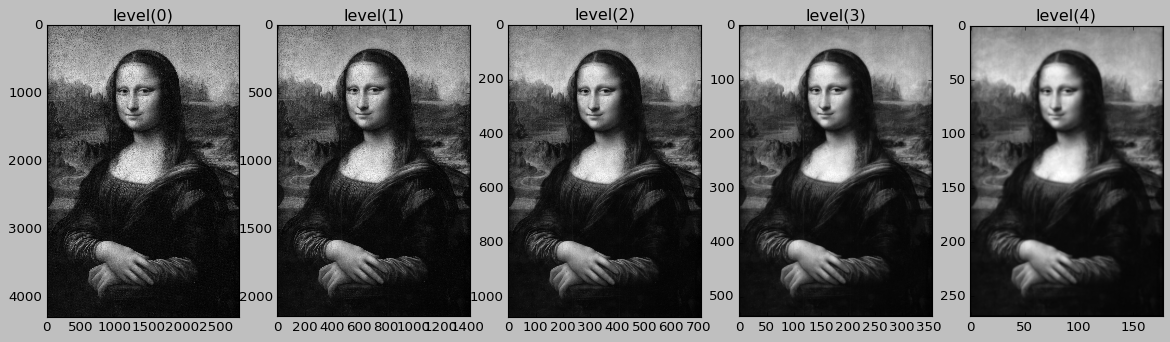

In [2]:
mona = cv2.imread('mona lisa.jpg',cv2.IMREAD_GRAYSCALE)

# gaussian pyramid
gaussian_pyr = gaussian_pyramid(mona,4)

figure = plt.figure(figsize=(18,18))
n = len(gaussian_pyr)

for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(gaussian_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')


5


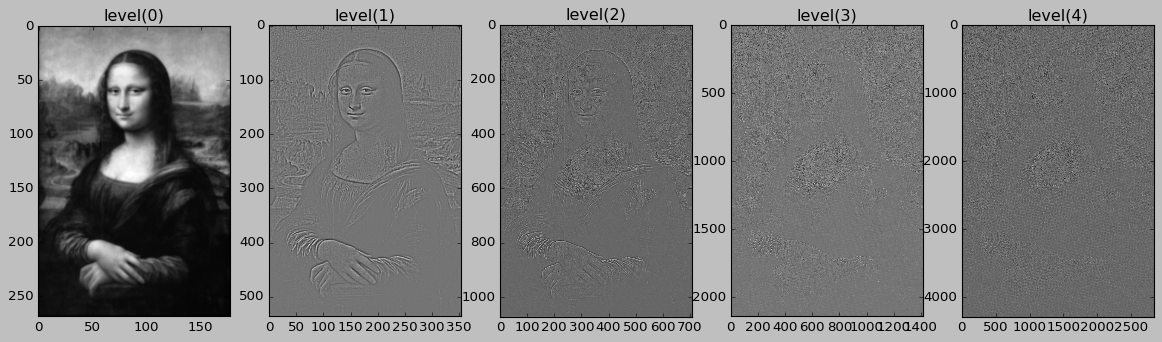

In [3]:
# laplacian pyramid
l_pyramid = laplacian_pyramid(gaussian_pyr)

figure = plt.figure(figsize=(18,18))
n = len(l_pyramid)

for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(l_pyramid[i],cmap='gray')
    plt.title(f"level({i})",color='black')

5.1.2. Describe how separability and cascading can help to speed up Gaussian smoothing and design a fast algorithm
for computing a 3-step gaussian pyramid (filtered with σ, √2σ, 2σ) of a 2D image using pseudo-code.


5.1.3. Given an image of size 𝑁 × 𝑁, where 𝑁 = 2
𝐽
, what is the maximum number of levels you can have in an 
approximation pyramid representation? (The maximum level is reached when the coarsest level has only 1 pixel). 
What is the total number of pixels in the pyramid (i.e. including pixels at all pyramid levels)? How does this 
number compare with the original number of pixels in the image? Since this number is larger than the original 
pixel number, what are some of the benefits of using the approximation pyramid? (give some examples). Repeat 
the step for the prediction residual pyramid. Display and discuss the results.


10


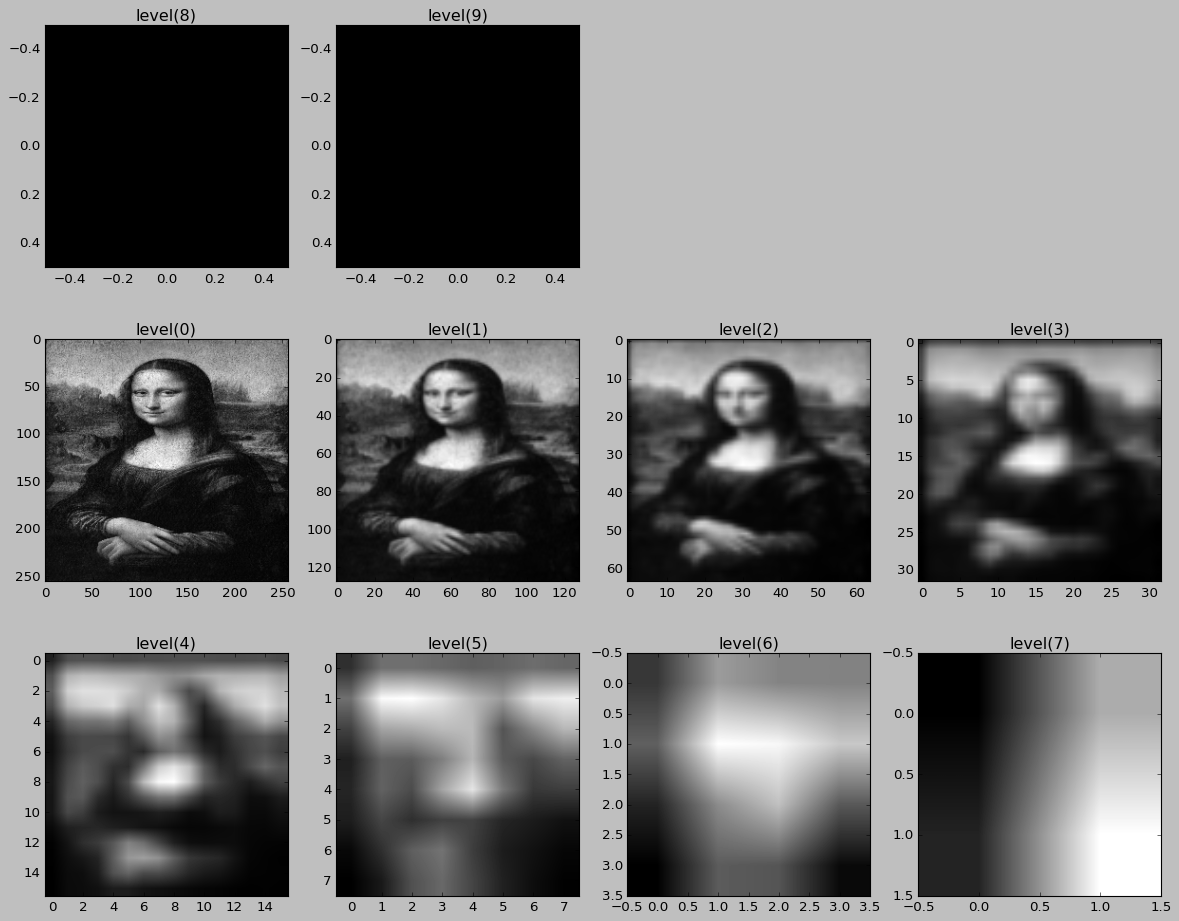

In [4]:
mona = cv2.imread('mona lisa.jpg',cv2.IMREAD_GRAYSCALE)
mona_r = cv2.resize(mona, (256, 256)).copy() 

gaussian_pyr = gaussian_pyramid(mona_r,9)

figure = plt.figure(figsize=(18,18))
n = len(gaussian_pyr)
print(n)
j=1
for i in range(n):
    x = i%8
    if x == 4:
        j +=1
    # if x < 4:
    figure.add_subplot(j,4,x+1)
    # else:
    #     figure.add_subplot(j,4,x+1)

    plt.imshow(gaussian_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')

MSE: 0.000000
None


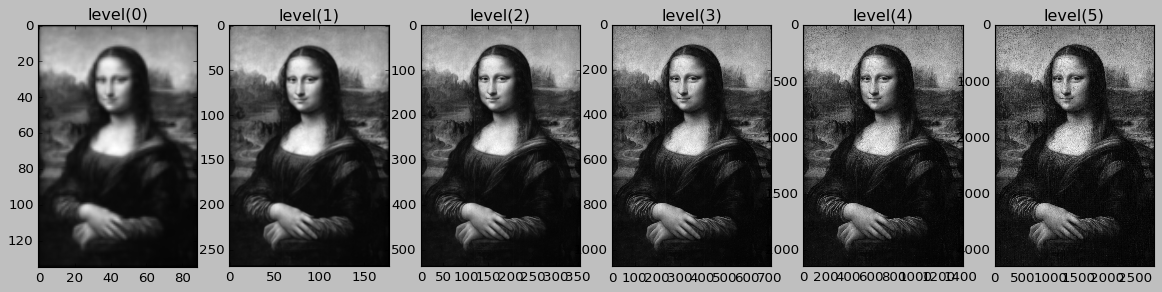

In [5]:
mona = cv2.imread('mona lisa.jpg',cv2.IMREAD_GRAYSCALE)

gaussian_pyr = gaussian_pyramid(mona,5)

laplacian_pyr,reconstruct_pyr = pyramid_reconstruct(gaussian_pyr)
n = len(reconstruct_pyr)
# print(n)
# print(len(gaussian_pyr),len(laplacian_pyr))

figure = plt.figure(figsize=(18,18))
for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(reconstruct_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')

print(print(f'MSE: {mean_square_error(mona,reconstruct_pyr[-1])}'))

5.1.4. For the grayscale Lena image, manually compute a 3-level approximation pyramid and corresponding prediction 
residual pyramid. Use 2x2 averaging for the approximation and use pixel replication for the interpolation filters.

approximation_pyr


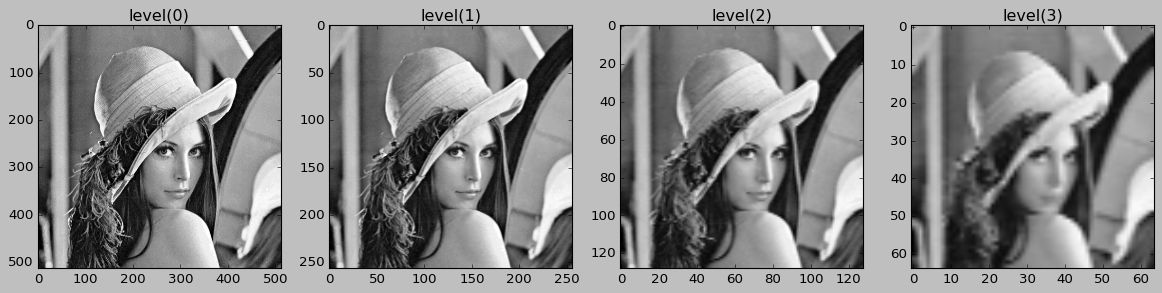

prediction_pyr


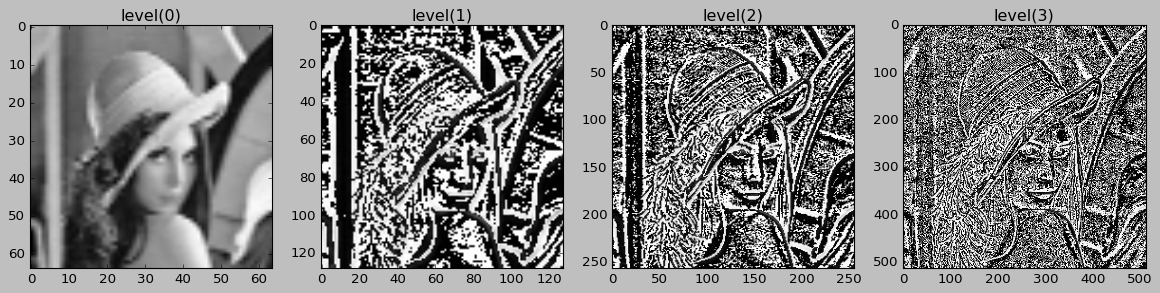

reconstruct_pyr


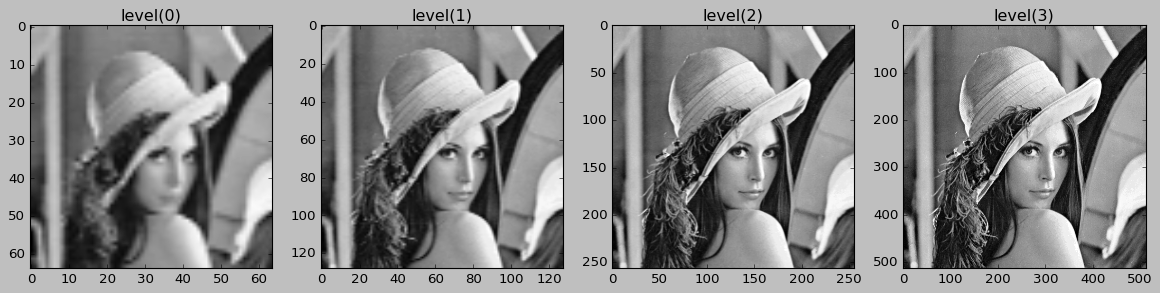

MSE: 0.000000


In [6]:
lena = cv2.imread('Lena.bmp',cv2.IMREAD_GRAYSCALE)
# print(lena.shape)
approximation_pyr = approximation_pyramid(lena,3)

prediction_pyr , reconstruct_pyr = pyramid_reconstruct(approximation_pyr)
n=len(approximation_pyr)

print("approximation_pyr")
figure = plt.figure(figsize=(18,18))
for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(approximation_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')
plt.show()

print('prediction_pyr')
figure2 = plt.figure(figsize=(18,18))
for i in range(n):
    figure2.add_subplot(1,n,i+1)
    plt.imshow(prediction_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')
plt.show()

print('reconstruct_pyr')
figure3 = plt.figure(figsize=(18,18))
for i in range(n):
    figure3.add_subplot(1,n,i+1)
    plt.imshow(reconstruct_pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')
plt.show()

print(f'MSE: {mean_square_error(lena,reconstruct_pyr[-1])}')

5.1.5. For the grayscale Lena Image, compute the wavelet transform (with 3-level) using the Haar analysis filters.
Comment on the differences between the pyramids generated in Prob. 5.1.2 with the ones generated here. 

Wavelet MSE: 0.001003
Wavelet PSNR: 78.11664534329813
Manual MSE: 0.000000
Manual PSNR: inf


c:\Users\siedt\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


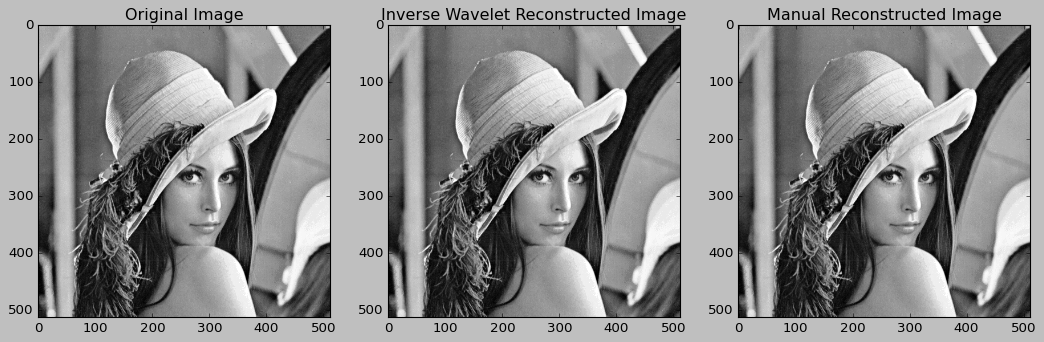

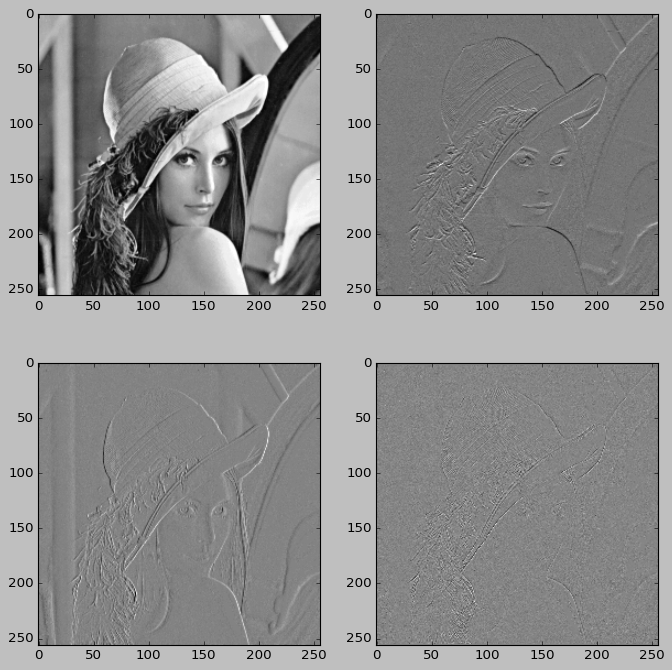

In [7]:
import pywt

lena = cv2.imread('Lena.bmp',cv2.IMREAD_GRAYSCALE)

# wavelet transform
cA, (cH, cV, cD) = pywt.dwt2(lena, 'haar', mode='periodization')

# inverse wavelet transform
coefficients = [cA, (cH, cV, cD)]
lena_i = pywt.idwt2(coefficients, 'haar', mode='periodization')
lena_i = lena_i.astype('uint8')

figure = plt.figure(figsize=(16,16))
figure.add_subplot(1,3,1)
plt.imshow(lena,cmap='gray')
plt.title('Original Image')

figure.add_subplot(1,3,2)
plt.imshow(lena_i,cmap='gray')
plt.title('Inverse Wavelet Reconstructed Image')

figure.add_subplot(1,3,3)
plt.imshow(reconstruct_pyr[-1],cmap='gray')
plt.title('Manual Reconstructed Image')

print(f'Wavelet MSE: {mean_square_error(lena,lena_i)}')
print(f'Wavelet PSNR: {PSNR(lena,lena_i)}')
print(f'Manual MSE: {mean_square_error(lena,reconstruct_pyr[-1])}')
print(f'Manual PSNR: {PSNR(lena,reconstruct_pyr[-1])}')


figure2 = plt.figure(figsize=(10, 10))
figure2.add_subplot(2, 2, 1)
plt.imshow(cA, cmap='gray')
# plt.axis('off')

figure2.add_subplot(2, 2, 2)
plt.imshow(cH, cmap='gray')
# plt.axis('off')

figure2.add_subplot(2, 2, 3)
plt.imshow(cV, cmap='gray')
# plt.axis('off')

figure2.add_subplot(2, 2, 4)
plt.imshow(cD, cmap='gray')
# plt.axis('off')
plt.show()

5.1.6. Quantize all the wavelet coefficients (whole sub-bands) created in Prob. 5.1.4 by a step size of 𝛾 = 2. Then 
reconstruct the image from the quantized wavelet coefficients using Haar synthesis filter. Report PSNR values 
and discuss the results.
𝑐
′
(𝑢, 𝑣) = 𝛾 × 𝑠𝑔𝑛[𝑐(𝑢, 𝑣)] × 𝑓𝑙𝑜𝑜𝑟 [
|𝑐(𝑢, 𝑣)|
𝛾
] , 𝑐 represents the wavelet coefficient
Note: you can use dwt2, idwt2, and psnr functions for problems 5.


MSE: 0.962563
PSNR: 48.296513951243725


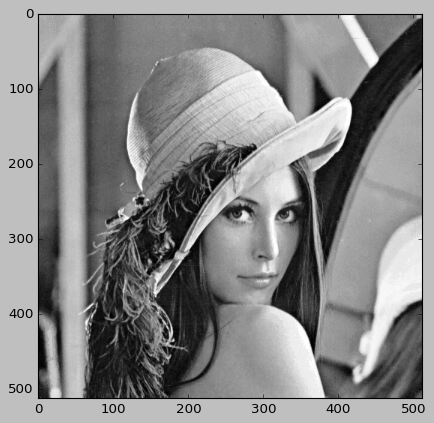

In [8]:
cA_new = coefficientQuantizer(cA)
# (cH, cV, cD)
cH_new = coefficientQuantizer(cH)
cV_new = coefficientQuantizer(cV)
cD_new = coefficientQuantizer(cD)

# inverse wavelet transform
coefficients = [cA_new, (cH_new, cV_new, cD_new)]
lena_i = pywt.idwt2(coefficients, 'haar', mode='periodization')
lena_i = lena_i.astype('uint8')

plt.imshow(lena_i,cmap='gray')

print(f'MSE: {mean_square_error(lena,lena_i)}')
print(f'PSNR: {PSNR(lena,lena_i)}')

MSE: 255.461372
PSNR: 24.057551199291538


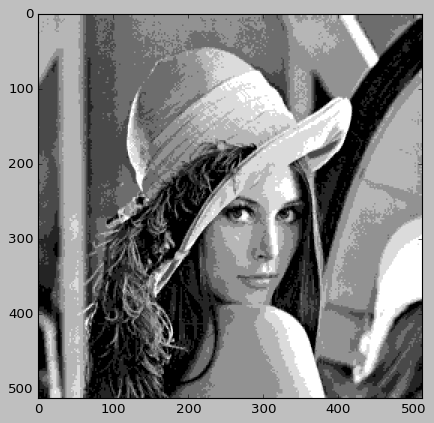

In [9]:
cA_new = coefficientQuantizer(cA,50)
# (cH, cV, cD)
cH_new = coefficientQuantizer(cH,50)
cV_new = coefficientQuantizer(cV,50)
cD_new = coefficientQuantizer(cD,50)

# inverse wavelet transform
coefficients = [cA_new, (cH_new, cV_new, cD_new)]
lena_i = pywt.idwt2(coefficients, 'haar', mode='periodization')
lena_i = lena_i.astype('uint8')

plt.imshow(lena_i,cmap='gray')

print(f'MSE: {mean_square_error(lena,lena_i)}')
print(f'PSNR: {PSNR(lena,lena_i)}')

# others

5


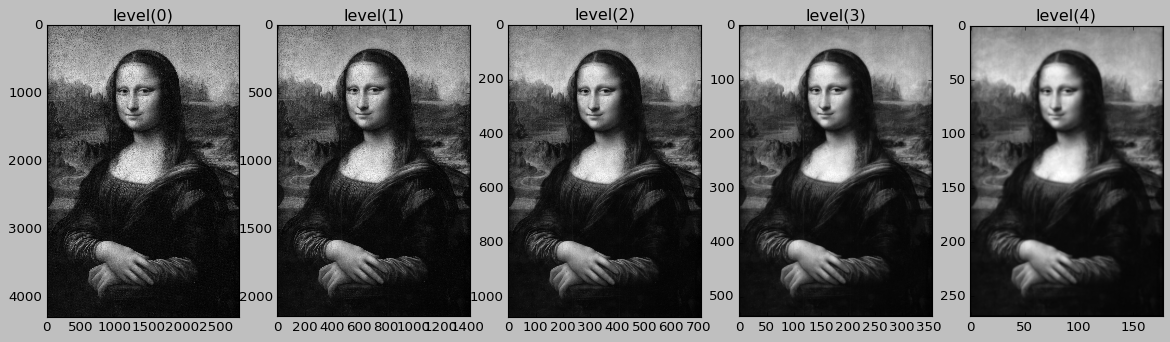

In [10]:
import matplotlib.pylab as plt
import numpy as np
    
from skimage import data
from scipy.signal import convolve2d
# https://cablanc.github.io/courses/2018-04-03-laplacian-pyramid.html


camera = cv2.imread("mona lisa.jpg",cv2.IMREAD_GRAYSCALE)
pyr = gaussian_pyramid(camera,4)
# img = disp_fmt_pyr(pyr)

# plt.imshow(pyr[-1],cmap='gray')
# plt.savefig('gauss_pyr.png', bbox_inches="tight")
figure = plt.figure(figsize=(18,18))
n = len(pyr)
print(n)
for i in range(n):
    figure.add_subplot(1,n,i+1)
    plt.imshow(pyr[i],cmap='gray')
    plt.title(f"level({i})",color='black')
# return 'gauss_pyr.png'